<h1 align="center"> Neural Networks Coursework </h1>

## Load Boston Dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston_data_frame = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data_frame['MEDV'] = boston.target
boston_data_frame.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Dataset Description

In [3]:
boston_data_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Dataset Analysis

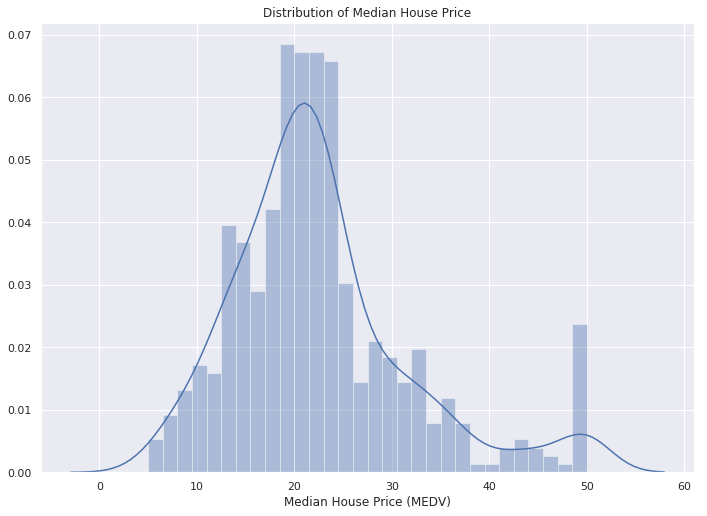

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(boston_data_frame['MEDV'], bins=30)
ax.set_title('Distribution of Median House Price')
ax.set_xlabel('Median House Price (MEDV)')
plt.show()

Target prices follows a normal distribution, though there are outliers. Specifically at the right extreme of the distribution, where there are many instance of the max median house price of $500000 dollars.

In [5]:
#remove rows where house price is equal to 50
boston_data_frame = boston_data_frame[boston_data_frame['MEDV'] != 50]

### Feature selection

When to use PCA:
When you are trying to find the latent features driving the patterns in the data
Dimensionallity reduction
visualize high dimentional data
reduce noice
use it as preprocessing before another task
ICA
Would use to draw out features which are assumed to be independant from one another using observed data 

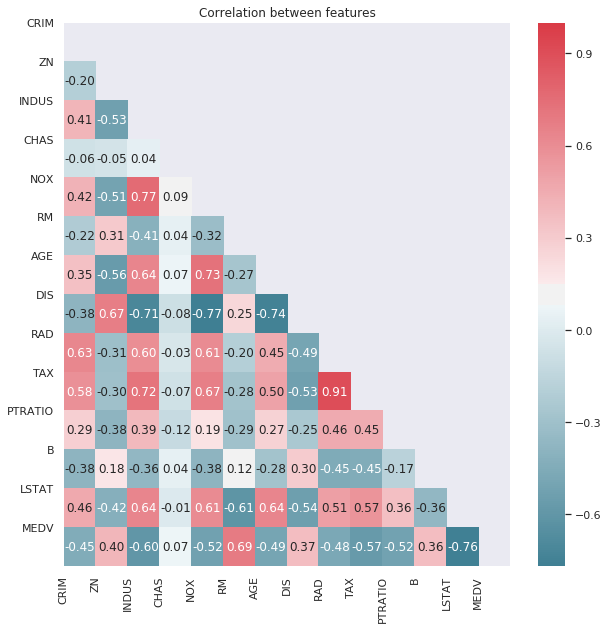

In [7]:
import seaborn as sns
boston_data_frame_corr = boston_data_frame.corr()
dropSelf = np.zeros_like(boston_data_frame_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(boston_data_frame_corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf).set_title('Correlation between features')

plt.xticks(range(len(boston_data_frame_corr.columns)), boston_data_frame_corr.columns)
plt.yticks(range(len(boston_data_frame_corr.columns)), boston_data_frame_corr.columns)

plt.show()

Both RM and LSTAT have a high correlation with the house price. RM (Number of rooms) has a strong positive correlation with the house price, agreeing with the asusmption that having more rooms within a house would increase the house price. Similarly, LSTAT( Lower Socioeconomic status) has a strong negative correlation with house prices, which again agrees with the assumption that houses in areas of a low social enconomic standing would be lower in price.

### Variance in Features

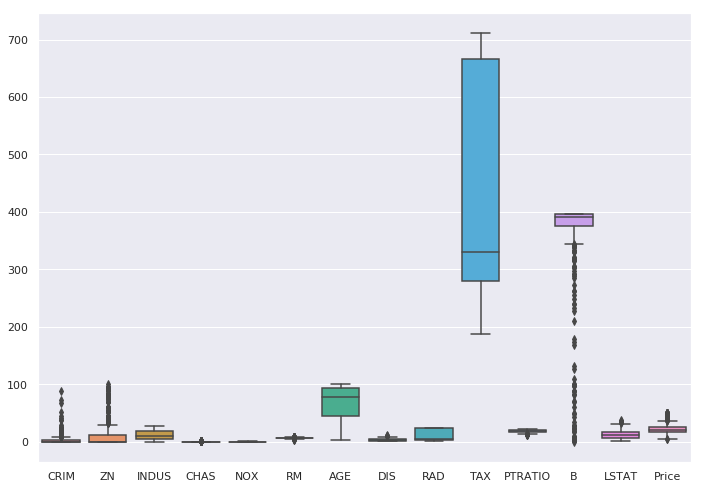

In [23]:
sns.boxplot(data=boston_data_frame)